In [2]:
import pandas as pd
import geopandas as gp
import pyproj as proj
%matplotlib inline

In [3]:
stops = gp.read_file('E:/Transit-Casa-Alex/Input/Bus_Stops/Bus_Stops_USft.shp')

OSError: no such file or directory: 'E:/Transit-Casa-Alex/Input/Bus_Stops/Bus_Stops_USft.shp'

In [17]:
data = gp.read_file('E:/Transit-Casa-Alex/Output/Buffers/Tenth/Data Shapefile/Buffer10_Data.shp')

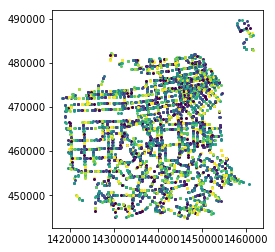

In [6]:
stops.plot()

In [16]:
data.columns

Index(['AGENCY_ID', 'ALAND10', 'AREA_FT', 'ARRIVAL_TI', 'BIKERACK',
       'BUFF_DIST', 'CAPACITY', 'CROWDED', 'CROWDHOURS', 'DEPARTURE_',
       'DOORCYCLES', 'DOW', 'DWELL', 'DWELL_S', 'EDHEALTH', 'EDHEALTH_D',
       'EOL', 'Employment', 'FARE', 'FULLFARE_R', 'GEOID10', 'HEADWAY_S',
       'Join_Count', 'LEISURE', 'LEISURE_DE', 'LOAD_ARR', 'LOAD_DEP', 'MONTH',
       'NUMDAYS', 'OBSDAYS', 'OBS_TRIP_S', 'OFF', 'ON', 'ONTIME5', 'ORIG_FID',
       'OTHER', 'OTHER_DEN', 'PASSDELAY_', 'PASSDELA_1', 'PASSHOURS',
       'PASSMILES', 'RDBRDNGS', 'RETAIL', 'RETAIL_DEN', 'RUNSPEED',
       'RUNSPEED_S', 'RUNTIME', 'RUNTIME_S', 'SERVMILES', 'SERVMILES_', 'SOL',
       'STOPNAME', 'STOPNAME_A', 'STOP_ID', 'STOP_LAT_x', 'STOP_LAT_y',
       'STOP_LON_x', 'STOP_LON_y', 'TARGET_FID', 'TIMEPOINT', 'TOTAL_EMP',
       'TOTSPEED', 'TOTSPEED_S', 'TOTTIME', 'TOTTIME_S', 'TRIP_STOPS', 'VC',
       'WAITHOURS', 'WGT_TRIP_S', 'WHEELCHAIR', 'geometry', 'w_geocode'],
      dtype='object')

KeyboardInterrupt: 

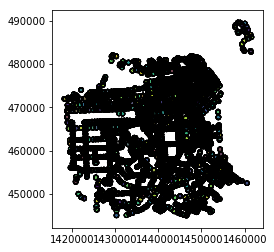

In [20]:
data.plot()

In [23]:
stops.crs

{'datum': 'NAD27',
 'lat_0': 36.5,
 'lat_1': 37.06666666666667,
 'lat_2': 38.43333333333333,
 'lon_0': -120.5,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 609601.2192024384,
 'y_0': 0}

## punted and did the process in GIS
* Still need to separate competing bus stops based on whether they are the same route or from different routes

# Start Here, got the ball back and scored

In [5]:
stops = gp.read_file('E:/Transit-Casa-Alex/Input/Bus_Stops/2009/Bus_Stops_2009.shp')

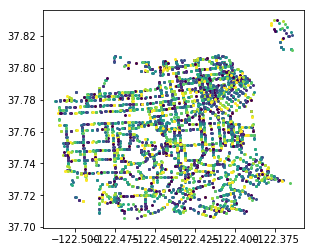

In [6]:
stops.plot()

In [7]:
stops.head()

,STOP_ID,STOP_LAT,STOP_LON,geometry
0,390,37.721190,-122.475096,POINT (-122.475096 37.72119)
1,392,37.765159,-122.477210,POINT (-122.47721 37.765159)
2,660,37.723914,-122.435387,POINT (-122.435387 37.723914)
3,913,37.719192,-122.425802,POINT (-122.425802 37.719192)
4,3001,37.788530,-122.396044,POINT (-122.396044 37.78853)


In [50]:
buffer = gp.read_file('E:/Transit-Casa-Alex/Output/Buffers/Quarter/Buffers_Quarter_GCS.shp')

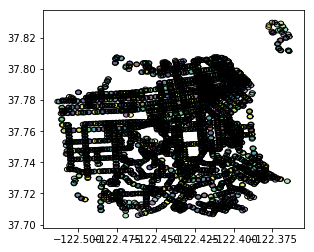

In [9]:
buffer.plot()

In [10]:
buffer.crs

{'init': 'epsg:4269'}

In [51]:
stops = stops.to_crs(buffer.crs)

In [52]:
joined = gp.sjoin(buffer[['STOP_ID','geometry']],stops[['STOP_LAT','STOP_LON','geometry']],how = 'left')

In [38]:
joined.head(20)

,STOP_ID,geometry,index_right,STOP_LAT,STOP_LON
0,390,POLYGON ((-122.4705331820959 37.72126641513931...,307,37.718050,-122.473180
0,390,POLYGON ((-122.4705331820959 37.72126641513931...,759,37.719040,-122.475380
0,390,POLYGON ((-122.4705331820959 37.72126641513931...,1507,37.719102,-122.475633
0,390,POLYGON ((-122.4705331820959 37.72126641513931...,299,37.719530,-122.474580
0,390,POLYGON ((-122.4705331820959 37.72126641513931...,1051,37.719719,-122.471533
0,390,POLYGON ((-122.4705331820959 37.72126641513931...,600,37.719728,-122.471739
0,390,POLYGON ((-122.4705331820959 37.72126641513931...,1015,37.720100,-122.475940
0,390,POLYGON ((-122.4705331820959 37.72126641513931...,1014,37.720218,-122.475313
0,390,POLYGON ((-122.4705331820959 37.72126641513931...,304,37.720940,-122.475004
0,390,POLYGON ((-122.4705331820959 37.72126641513931...,303,37.721110,-122.475302


In [53]:
comp = joined[['STOP_ID','geometry']].groupby(by = 'STOP_ID',as_index = False).count()

In [54]:
comp.columns=['STOP_ID','NUM_BUS_STOPS']

In [55]:
comp.NUM_BUS_STOPS = comp.NUM_BUS_STOPS - 1

In [56]:
comp.to_csv('E:/Transit-Casa-Alex/Output/Buffer Data/Competing Stops Buffers/2009/Quarter_Comp_Bus_Stops.csv')